In [25]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [14]:
# Loading the dataset 
data=pd.read_csv('BostonHousing.csv')

# retreiving the shape of the dataset
print(data.shape)

# retreiving the first 5 rows of the dataset
print(data.head(5))






(506, 14)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [15]:
# retreriving the statistical summary of the dataset
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [16]:
# checking for the missing values 
print(f"The number of Null Values in the dataset are : {data.isnull().sum().sum()}") 


The number of Null Values in the dataset are : 0


In [17]:

# checking for the correlation between the features,-1 indicates negative correlation, 1 indicates positive correlation and 0 indicates no correlation 
print(data.corr())

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

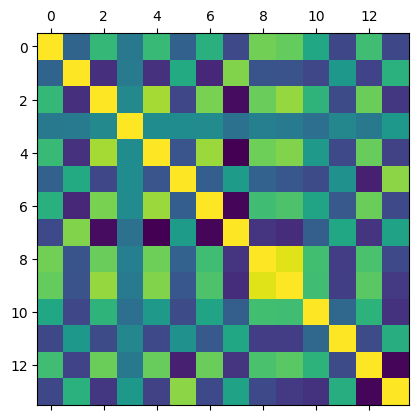

In [18]:
# plotting the correlation matrix
plt.matshow(data.corr())

In [22]:
# selecting the target value
Y=data['medv']


# selecting the feature variables by dropping the target variable from the dataset
X=data.drop(labels='medv',axis=1)





In [23]:
# splitting the dataset into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# creating the model
linear_regressor=LinearRegression()

# fitting the model
linear_regressor.fit(X_train,Y_train)



LinearRegression()

In [27]:
# predicting the values 
Y_pred=linear_regressor.predict(X_test)

# Evaluating the model
mse=mean_squared_error(Y_test,Y_pred)


# calculating the r2 score
r2=r2_score(Y_test,Y_pred)

# printing the mean squared error and R2 score 
print(f"The Mean Squared Error (MSE) is {mse} and the R2 score is {r2}")




The Mean Squared Error (MSE) is 33.448979997676446 and the R2 score is 0.5892223849182519


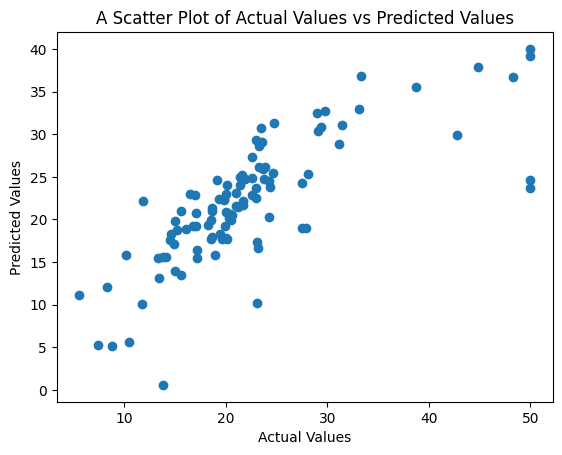

In [31]:
# plotting the actual values vs the predicted values 
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("A Scatter Plot of Actual Values vs Predicted Values")
plt.show()

In [34]:
# predicting the value of a new data point 
new_datapoint=[[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]
new_prediction=linear_regressor.predict(new_datapoints)
print(f"The Predicted Value of the new data point is {new_prediction}")




The Predicted Value of the new data point is [30.49949836]


C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
